# Basic Example

In [1]:
import piscola

print(f'PISCOLA version: v{piscola.__version__}')

PISCOLA version: v3.0.0


PISCOLA uses its own format for a SN file (explained SOMEWHERE ELSE) which has a similar format to that used by other codes. As an example, we have SN `03D1au` (from the SNLS survey) in a file called `03D1au.dat`. This file can be downloaded from the repository. To import a SN, all that needs to be done is use the `call_sn()` function, which receives the name of the file as an argument:

In [2]:
sn = piscola.call_sn('../../data/03D1au.dat')
print(sn)
print(f'Observed bands: {sn.bands}')

name: 03D1au, z: 0.50349, ra: 36.043, dec: -4.0375

Observed bands: ['Megacam_g', 'Megacam_r', 'Megacam_i', 'Megacam_z']


The `sn` object will contain all the necessary information, i.e. name, redshift, RA, DEC and the observed multi-colour light curves. The latter are found in `sn.lcs`, a `Lightcurves()` object, which also includes the zero-points (`zp`), and magnitude system (`mag_sys`):

In [3]:
sn.lcs

['Megacam_g', 'Megacam_r', 'Megacam_i', 'Megacam_z']

In [4]:
sn.lcs.Megacam_g

band: Megacam_g, zp: -20.846, mag_sys: AB
other attributes: times, fluxes, flux_errors, magnitudes, mag_errors

In [5]:
sn.lcs.Megacam_g.__dict__

{'band': 'Megacam_g',
 'times': array([52880.58, 52900.49, 52904.6 , 52908.53, 52930.39, 52934.53,
        52937.55, 52944.39, 52961.45, 52964.37, 52992.33, 52999.32]),
 'fluxes': array([-1.85848101e-20,  1.70044129e-18,  1.89317266e-18,  1.85866457e-18,
         4.68383103e-19,  3.39987304e-19,  3.07085307e-19,  1.45787510e-19,
         1.58865710e-19,  8.00752930e-20,  8.87940928e-20,  2.56975152e-21]),
 'flux_errors': array([3.93722644e-20, 9.87059915e-20, 5.70393061e-20, 5.37353399e-20,
        4.80910642e-20, 4.34563338e-20, 7.37426910e-20, 8.37463666e-20,
        7.89280825e-20, 5.21292452e-20, 6.20411439e-20, 5.51119925e-20]),
 'zp': np.float64(-20.845742237479524),
 'magnitudes': array([        nan, 23.57785366, 23.4612822 , 23.48125521, 24.97775471,
        25.32560101, 25.43611017, 26.24495696, 26.15168234, 26.89551142,
        26.78329758, 30.62952993]),
 'mag_errors': array([        nan,  0.06302403,  0.03271209,  0.03138942,  0.11147757,
         0.13877611,  0.26072595,  

The light curves can be plotted by calling the function `sn.plot_lcs()`:

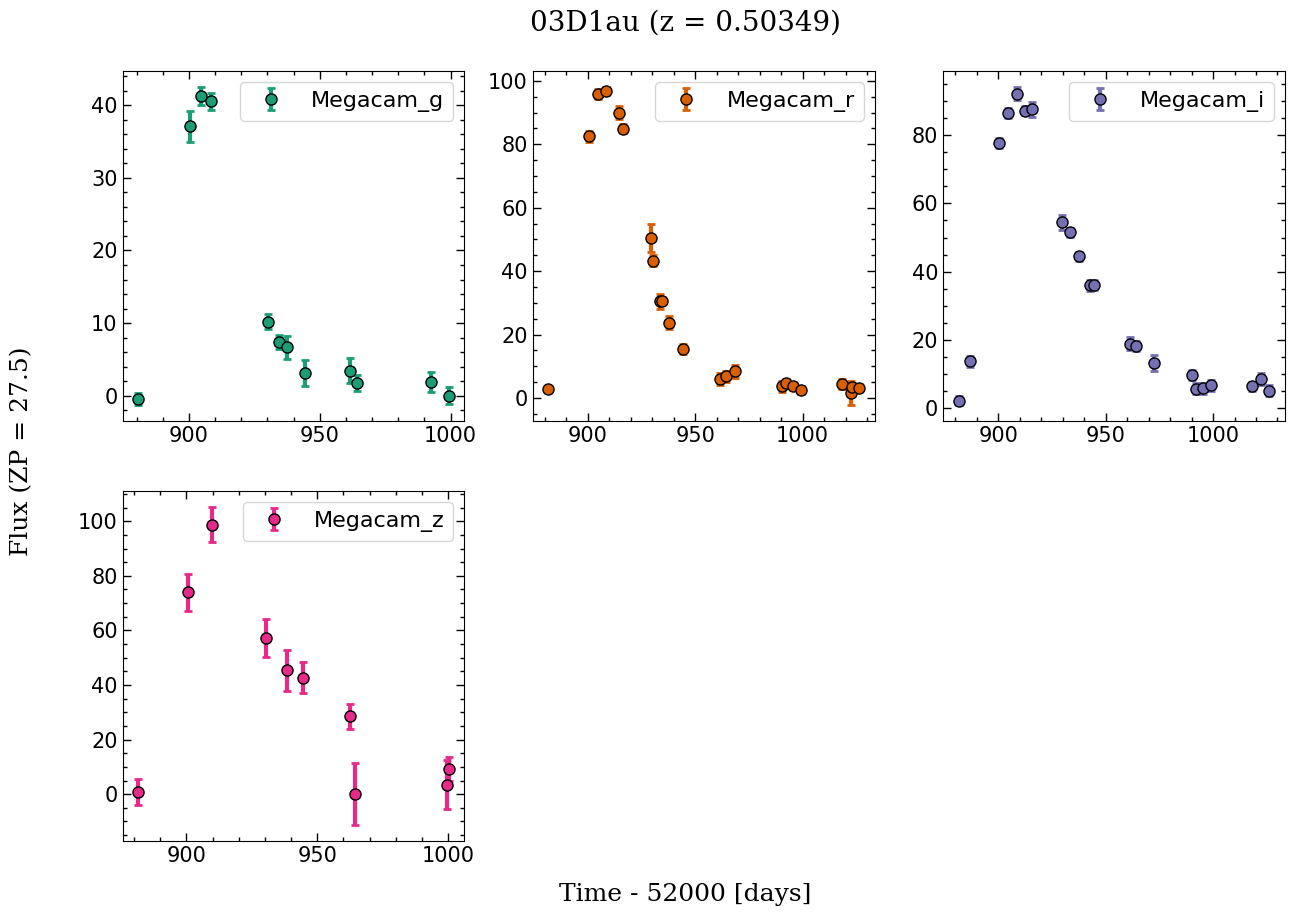

In [6]:
sn.plot_lcs()

To fit the light curves one needs to use `sn.fit()`, where the user can decide which kernels to use. By default, PISCOLA uses `Matern52` for the time axis, and `ExpSquared` for the wavelength axis. The wavelength axis is fitted in logarithmic space. One can also plot the fits afterwards by using `sn.plot_fits()`. From the fits, one gets an estimation of the epoch of rest-frame B-band peak (plotted as a vertical dashed line):

In [7]:
sn.fit()

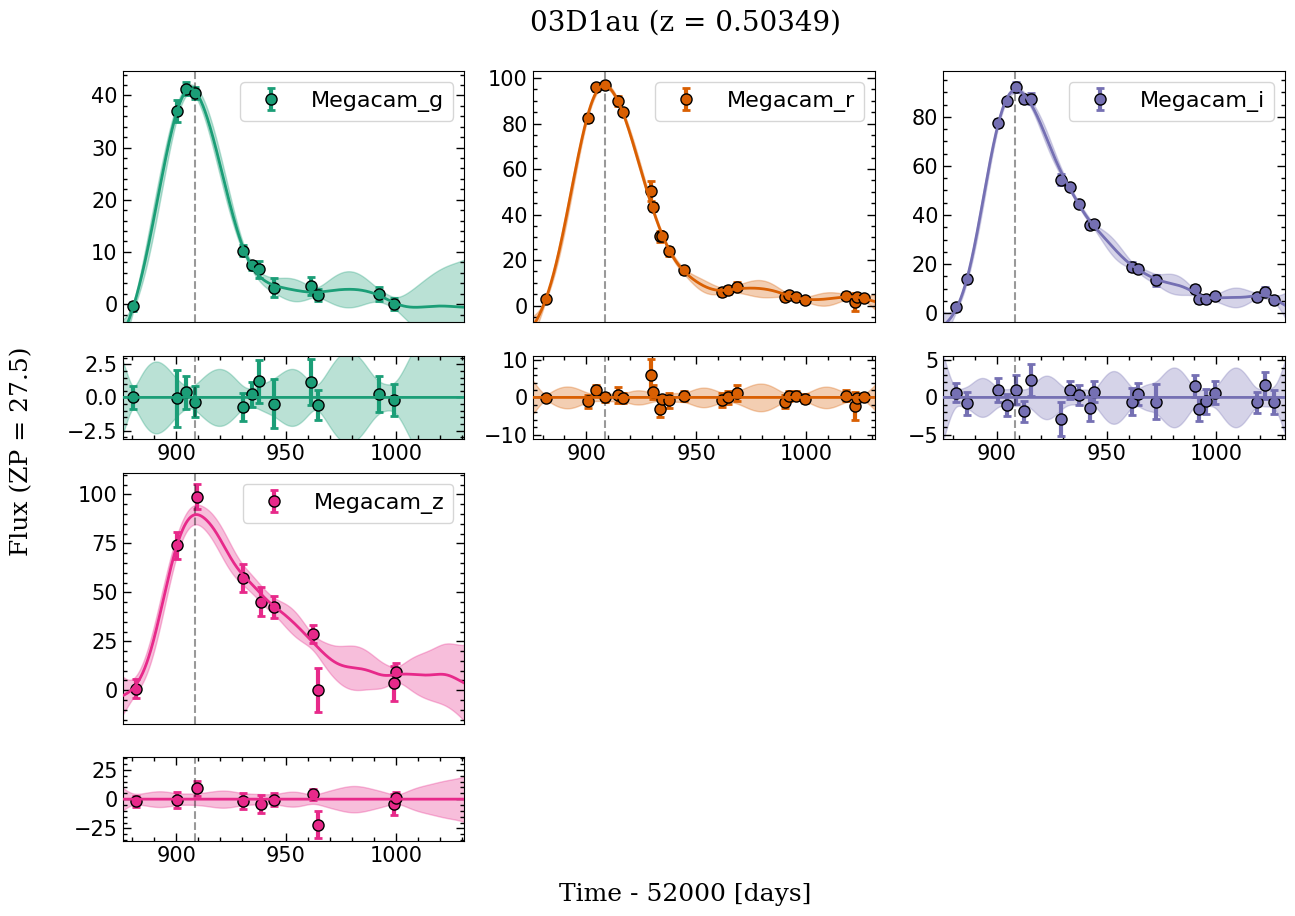

In [8]:
sn.plot_fits()

The fitting process includes: the fits of the observed light curves, Milky-Way extinction correction and redshift correction. Finally, we can check the calculated rest-frame light-curves parameters:

In [9]:
sn.lc_parameters

{'tmax': np.float64(52908.356),
 'tmax_err': np.float64(0.121),
 'mmax': np.float64(23.039),
 'mmax_err': np.float64(0.015),
 'dm15': np.float64(0.837),
 'dm15_err': np.float64(0.033),
 'colour': np.float64(-0.034),
 'colour_err': np.float64(0.041),
 'Bessell_B': {'tmax': np.float64(52908.356),
  'tmax_err': np.float64(0.121),
  'mmax': np.float64(23.039),
  'mmax_err': np.float64(0.015),
  'dm15': np.float64(0.837),
  'dm15_err': np.float64(0.033)},
 'Megacam_g': {'tmax': np.float64(52908.657),
  'tmax_err': np.float64(0.21),
  'mmax': np.float64(22.989),
  'mmax_err': np.float64(0.015),
  'dm15': np.float64(0.628),
  'dm15_err': np.float64(0.03)},
 'Megacam_r': {'tmax': np.float64(52909.258),
  'tmax_err': np.float64(3.053),
  'mmax': np.float64(22.932),
  'mmax_err': np.float64(0.108),
  'dm15': np.float64(0.563),
  'dm15_err': np.float64(0.176)},
 'Megacam_i': {'tmax': np.float64(52909.409),
  'tmax_err': np.float64(13.405),
  'mmax': np.float64(22.722),
  'mmax_err': np.float64(0.

## In Summary

To fit a supernova, simply follow these steps:

In [10]:
import piscola

sn = piscola.call_sn('../../data/03D1au.dat')
sn.fit()

The `sn` object can also be stored...

In [11]:
sn.save()

and later be loaded...

In [12]:
sn2 = piscola.load_sn('03D1au.pisco')
sn2

name: 03D1au, z: 0.50349, ra: 36.043, dec: -4.0375